In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1234)

# Load mnist data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Adjusting to 0 ~ 1.0
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape, x_test.shape)

# (60000, 28, 28) (10000, 28, 28)
# 28x28 매트릭스가 60000개 /10000개 저장

(60000, 28, 28) (10000, 28, 28)


In [20]:
# CNN Input 형태로 변환
# CNN(흑백) 채널 1

x_train_1 = x_train.reshape(-1, 28, 28, 1)
x_test_1 = x_test.reshape(-1, 28, 28, 1)

# CNN(흑백) 채널 2

x_train_2 = x_train.reshape(-1, 28, 28, 1)
x_test_2 = x_test.reshape(-1, 28, 28, 1)

In [21]:
# Dense Input 
# Keras functional API 아키텍처 확인을 목적으로 
# 임의의(동일한 데이터) 입력 데이터를 준비

# Dense 채널 1
x_train_dense_1 = x_train.reshape(-1, 28, 28)
x_test_dense_1 = x_test.reshape(-1, 28, 28)

# Dense 채널 2
x_train_dense_2 = x_train.reshape(-1, 28, 28)
x_test_dense_2 = x_test.reshape(-1, 28, 28)

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_52 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
input_51 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_65 (Conv2D)              (None, 26, 26, 16)   160         input_52[0][0]                   
__________________________________________________________________________________________________
conv2d_63 (Conv2D)              (None, 26, 26, 16)   160         input_51[0][0]                   
____________________________________________________________________________________________

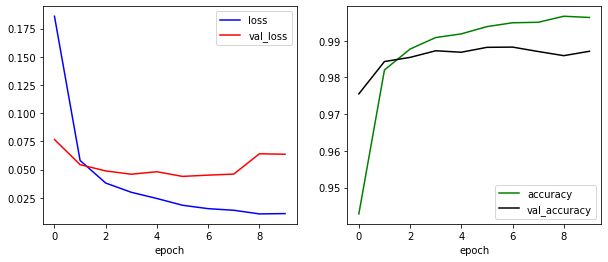

0.03802589699625969 0.9908999800682068


In [33]:
# API 일부 주석처리하여 고의로 성능이 떨어지는(떨어질 것으로 예상되는) 
# 다수의 모델의 결합으로 구성 (220515)

# CNN API_1 
Input_shape_1 = (28,28,1)
img_input_1 = tf.keras.layers.Input(shape=Input_shape_1)
h = tf.keras.layers.Conv2D(kernel_size=(3,3), filters=16, activation='relu')(img_input_1)
h = tf.keras.layers.MaxPooling2D((2,2))(h)
h = tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32, activation='relu')(h)
h = tf.keras.layers.MaxPooling2D((2,2))(h)
#h = tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, activation='relu')(h)
h = tf.keras.layers.Flatten()(h)
img_cnn_out_1 = tf.keras.layers.Dense(32, activation='relu')(h)

# CNN API_2 
Input_shape_2 = (28,28,1)
img_input_2 = tf.keras.layers.Input(shape=Input_shape_2)
hh = tf.keras.layers.Conv2D(kernel_size=(3,3), filters=16, activation='relu')(img_input_2)
hh = tf.keras.layers.MaxPooling2D((2,2))(hh)
hh = tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32, activation='relu')(hh)
hh = tf.keras.layers.MaxPooling2D((2,2))(hh)
hh = tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, activation='relu')(hh)
hh = tf.keras.layers.Flatten()(hh)
img_cnn_out_2 = tf.keras.layers.Dense(32, activation='relu')(hh)

# Dense API_1
Input_shape_dense_1 = (28,28)
img_input_dense_1 = tf.keras.layers.Input(shape=Input_shape_dense_1)
hhh = tf.keras.layers.Flatten()(img_input_dense_1)
hhh = tf.keras.layers.Dense(64, activation='relu')(hhh)
#hhh = tf.keras.layers.Dropout(0.2)(hhh)
#hhh = tf.keras.layers.Dense(64, activation='relu')(hhh)
img_dense_out_1 = tf.keras.layers.Dropout(0.2)(hhh)

# Dense API_2
Input_shape_dense_2 = (28,28)
img_input_dense_2 = tf.keras.layers.Input(shape=Input_shape_dense_2)
hhhh = tf.keras.layers.Flatten()(img_input_dense_2)
hhhh = tf.keras.layers.Dense(32, activation='relu')(hhhh) # 32로 수정
#hhhh = tf.keras.layers.Dropout(0.2)(hhhh)
#hhhh = tf.keras.layers.Dense(64, activation='relu')(hhhh)
img_dense_out_2 = tf.keras.layers.Dropout(0.2)(hhhh)


# CNN API 1, 2 + Dense API 1, 2 결합
concatenated = tf.keras.layers.concatenate([img_cnn_out_1, img_cnn_out_2, img_dense_out_1, img_dense_out_2])
predictions = tf.keras.layers.Dense(10, activation='softmax')(concatenated)

# API model 정의
model = tf.keras.Model(inputs=[img_input_1, img_input_2, img_input_dense_1, img_input_dense_2], outputs=predictions)
model.summary()

# Compile and Train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit([x_train_1, x_train_2, x_train_dense_1, x_train_dense_2], y_train, epochs=10, validation_split=0.25, verbose=2)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r-', label='val_loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k-', label='val_accuracy')
plt.xlabel('epoch')
plt.legend()

plt.show()

# Model evaluate
test_loss, test_acc = model.evaluate([x_test_1, x_test_2, x_test_dense_1, x_test_dense_2], y_test, verbose=0)

print(test_loss, test_acc)

model.save('my_model.h5')

In [ ]:
# 조기 종료
# https://tykimos.github.io/2017/07/09/Early_Stopping/

# 학습 과정 표시하기
# https://tykimos.github.io/2017/07/09/Training_Monitoring/